<a href="https://colab.research.google.com/github/CrysisDavid/ProgramacionLineal/blob/main/Ejemplo_Programacion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Programación Lineal

Este es un ejemplo de solución de un problema de **Programación Lineal**, utilizando [NumPy](https://numpy.org), [SciPy](https://www.scipy.org), y [Matplotlib](https://matplotlib.org).

- Diego Fernando Marin

## Hola, this is a control version tool


Importar las librerías necesarias:

In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

## Problema:

Una fabrica produce 2 productos llamados **A** y **B**.

Para fabricar cada producto se necesita un cantidad determinada de unidades de materiales y de unidades de tiempo de trabajo, la venta de cada unidad de producto genera un ingreso, de acuerdo a esta tabla:

||producto A|producto B|
|:--|:-:|:-:|
|Material|2|5|
|Tiempo de Trabajo|4|2|
|Ingreso|3|4|

La fabrica dispone de 30 unidades de materiales y 20 unidades de tiempo de trabajo.

La fabrica necesita un plan de producción que le indique cuántas unidades de cada producto debe fabricar con los recursos disponibles de tal forma que pueda obtener el máximo de utilidad.


$$ \max_{x,y} \quad z = 3x + 4y \\
sujeto\ a:\\
2x + 5y \quad \leq 30 \\
4x + 2y \quad \leq 20 \\
\quad x, y \quad \geq 0 $$

## Solución numérica:

In [2]:
# función objetivo z: [x, y]
z = [-3, -4] # negativo porque la funcion objetivo es maximizar
# restricciones:
A = [[2, 5], [4, 2]]
b = [30, 20]
# limites (min, max)
x_lim = (0, None) # >= 0 -> entre 0 e infinito
y_lim = (0, None)
# solución: función objetivo = z, restricciones = A, b, limites = x_lim, y_lim
sol = linprog(z, A_ub=A, b_ub=b, bounds=[x_lim, y_lim])
print(f"solución: x={sol.x[0]} y={sol.x[1]} ingresos ${-sol.fun}")

solución: x=2.5 y=5.0 ingresos $27.5


## Solución gráfica

In [4]:
# valores de x
xs = np.linspace(-1, 15, 100) # x_min, x_max, numero de puntos
# funciones de las restricciones
y1 = (30 - 2*xs)/5
y2 = (20 - 4*xs)/2
# limite inferior para las áreas
y3 = np.zeros_like(xs)

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
C:\Users\david\AppData\Local\Temp\ipykernel_8048\3348593080.py:18: SyntaxWarning: invalid escape sequence '\l'
  ax.text(0, 11, "$2x + 5y \leq 30$", size=10)
C:\Users\david\AppData\Local\Temp\ipykernel_8048\3348593080.py:19: SyntaxWarning: invalid escape sequence '\l'
  ax.text(11, 2.3, "$4x + 2y \leq 20$", size=10)


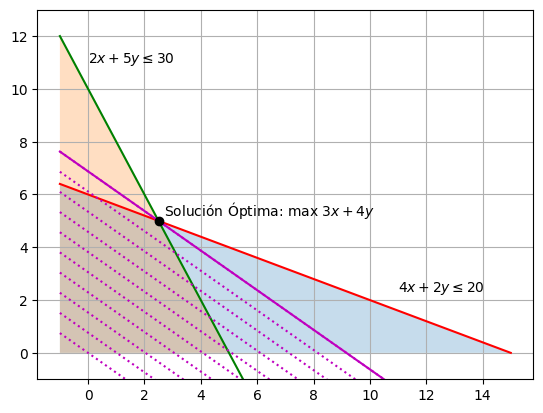

In [5]:
# figura
fig, ax = plt.subplots()
# limites de y
ax.set_ylim(-1, 13)
# graficar las restricciones
ax.plot(xs, y1, 'r')
ax.plot(xs, y2, 'g')
plt.fill_between(xs, y1, y3, where=y1>=y3, alpha=0.25)
plt.fill_between(xs, y2, y3, where=y2>=y3, alpha=0.25)
# graficar las posibles "soluciones"
for yi in np.linspace(0, -sol.fun, 10):
  yx = (yi-3*xs)/4
  ax.plot(xs, yx, 'm:')
# resaltar la solución óptima
ax.plot(xs, yx, 'm-')
ax.plot(sol.x[0], sol.x[1], "ko")
# textos
ax.text(0, 11, "$2x + 5y \leq 30$", size=10)
ax.text(11, 2.3, "$4x + 2y \leq 20$", size=10)
ax.text(2.7, 5.2, "Solución Óptima: max $3x + 4y$", size=10)
# mostrar
ax.grid()
plt.show()